# ENEXIS Graduation Project

#### Create a model predicting the 'opwek' based on demographical data

### Collect Initial Data

In [72]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

### Get the data

In [73]:
combined_dataset_name = 'combined_CBS_dataset_84583.csv'
df = pd.read_csv(filepath_or_buffer = combined_dataset_name,
                         sep                = ',',
                         decimal            = ',',
                         thousands          = '.',
                         encoding           = 'unicode_escape')                                   # 1

## Models
### Linear model Y=opgesteld vermogen, X=Aantal huishoudens

In [74]:


train_set, test_set = train_test_split(df, test_size=0.2)
print(f"training set: {len(train_set)}\n    test set: {len(test_set)}")

y_column = 'Opgesteld_vermogen'
columns_to_keep = ['Omgevingsadressendichtheid_116']
# HuishoudensTotaal_28
# colomns_to_drop = ['Opgesteld_vermogen','Netbeheerder','Provincie','CBS_Buurt', 'Gemeente', 'WijkenEnBuurten']

Y_train_set = train_set[y_column]
X_train_set = train_set.drop(colomns_to_drop, axis=1).copy()
Y_test_set = train_set[y_column]
X_test_set = train_set.drop(colomns_to_drop, axis=1).copy()


training set: 380
    test set: 95


In [75]:
X_test_set.head()

,Peildatum,CBS_Buurtcode,Aantal_aansluitingen_in_CBS-buurt,Aantal_aansluitingen_met_opwekinstallatie,Gemeentenaam_1,SoortRegio_2,MeestVoorkomendePostcode_113,HuishoudensTotaal_28,GemiddeldeHuishoudensgrootte_32,Bevolkingsdichtheid_33,...,InBezitOverigeVerhuurders_43,BouwjaarVanaf2000_46,GemiddeldElektriciteitsverbruikTotaal_47,GemiddeldAardgasverbruikTotaal_55,Gemiddeld_opleidingsniveau,Percent_inkomensontvangers,Bedrijfsvestigingen_per_huishuidens,PersonenautoSPerHuishouden_102,AfstandTotSchool_108,Omgevingsadressendichtheid_116
152,2020070,10910070,6400,1720,Coevorden,Buurt,7741,685,24.0,26650.0,...,40.0,0.0,29800.0,12800.0,1.834586e+16,7.902736e+14,802919708029197,13.0,14.0,6370
363,2020070,173107020,1010,240,Midden-Drenthe,Buurt,9421,70,26.0,3940.0,...,30.0,70.0,32300.0,18200.0,1.933333e+16,1.081081e+16,2857142857142857,14.0,14.0,1340
198,2020070,10950670,1050,180,Coevorden,Buurt,7853,20,23.0,40.0,...,NaN,NaN,39000.0,16000.0,NaN,0.000000e+00,125,NaN,13.0,440
102,2020070,10608050,3790,620,Assen,Buurt,9408,375,28.0,76140.0,...,20.0,1000.0,29100.0,10900.0,2.108108e+15,6.603774e+14,1066666666666666,12.0,5.0,9710
445,2020070,170102000,850,300,Westerveld,Buurt,8437,70,22.0,7360.0,...,10.0,100.0,30300.0,16500.0,2.076923e+15,6.250000e+02,2857142857142857,12.0,34.0,830


In [76]:


lin_reg = LinearRegression()
lin_reg.fit(X_train_set, Y_train_set)

ValueError: could not convert string to float: 'Coevorden'

#### Check the quality of the model

Coefficients: 
 [ 0.00000000e+00  1.28549041e-05  2.79087722e-01  2.77579763e+00
 -1.47319057e+00]
Mean squared error: 177262621.22
Coefficient of determination: 0.16


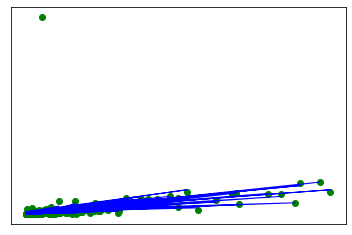

In [ ]:
# Make predictions using the testing set
y_pred = lin_reg.predict(X_test_set)

# The coefficients
print("Coefficients: \n", lin_reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y_test_set, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Y_test_set, y_pred))

#fix the fact that x and y are not the same dimensions
x_s_huishoudens_totaal = X_test_set['HuishoudensTotaal_28']
# Plot outputs
plt.scatter(x_s_huishoudens_totaal, Y_test_set, color="green")

plt.xlabel = 'Huishoudens total (#)'
plt.xticks(())
plt.ylabel = 'Opgesteld vermogen (wP)'
plt.yticks(())

plt.show()

# plt.ylim(0, 12)